In [18]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

In [2]:
seed = 155
np.random.seed(seed)
df=pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
y=df['Outcome']
df=df.drop('Outcome',axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:

scaler=StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(data=df,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


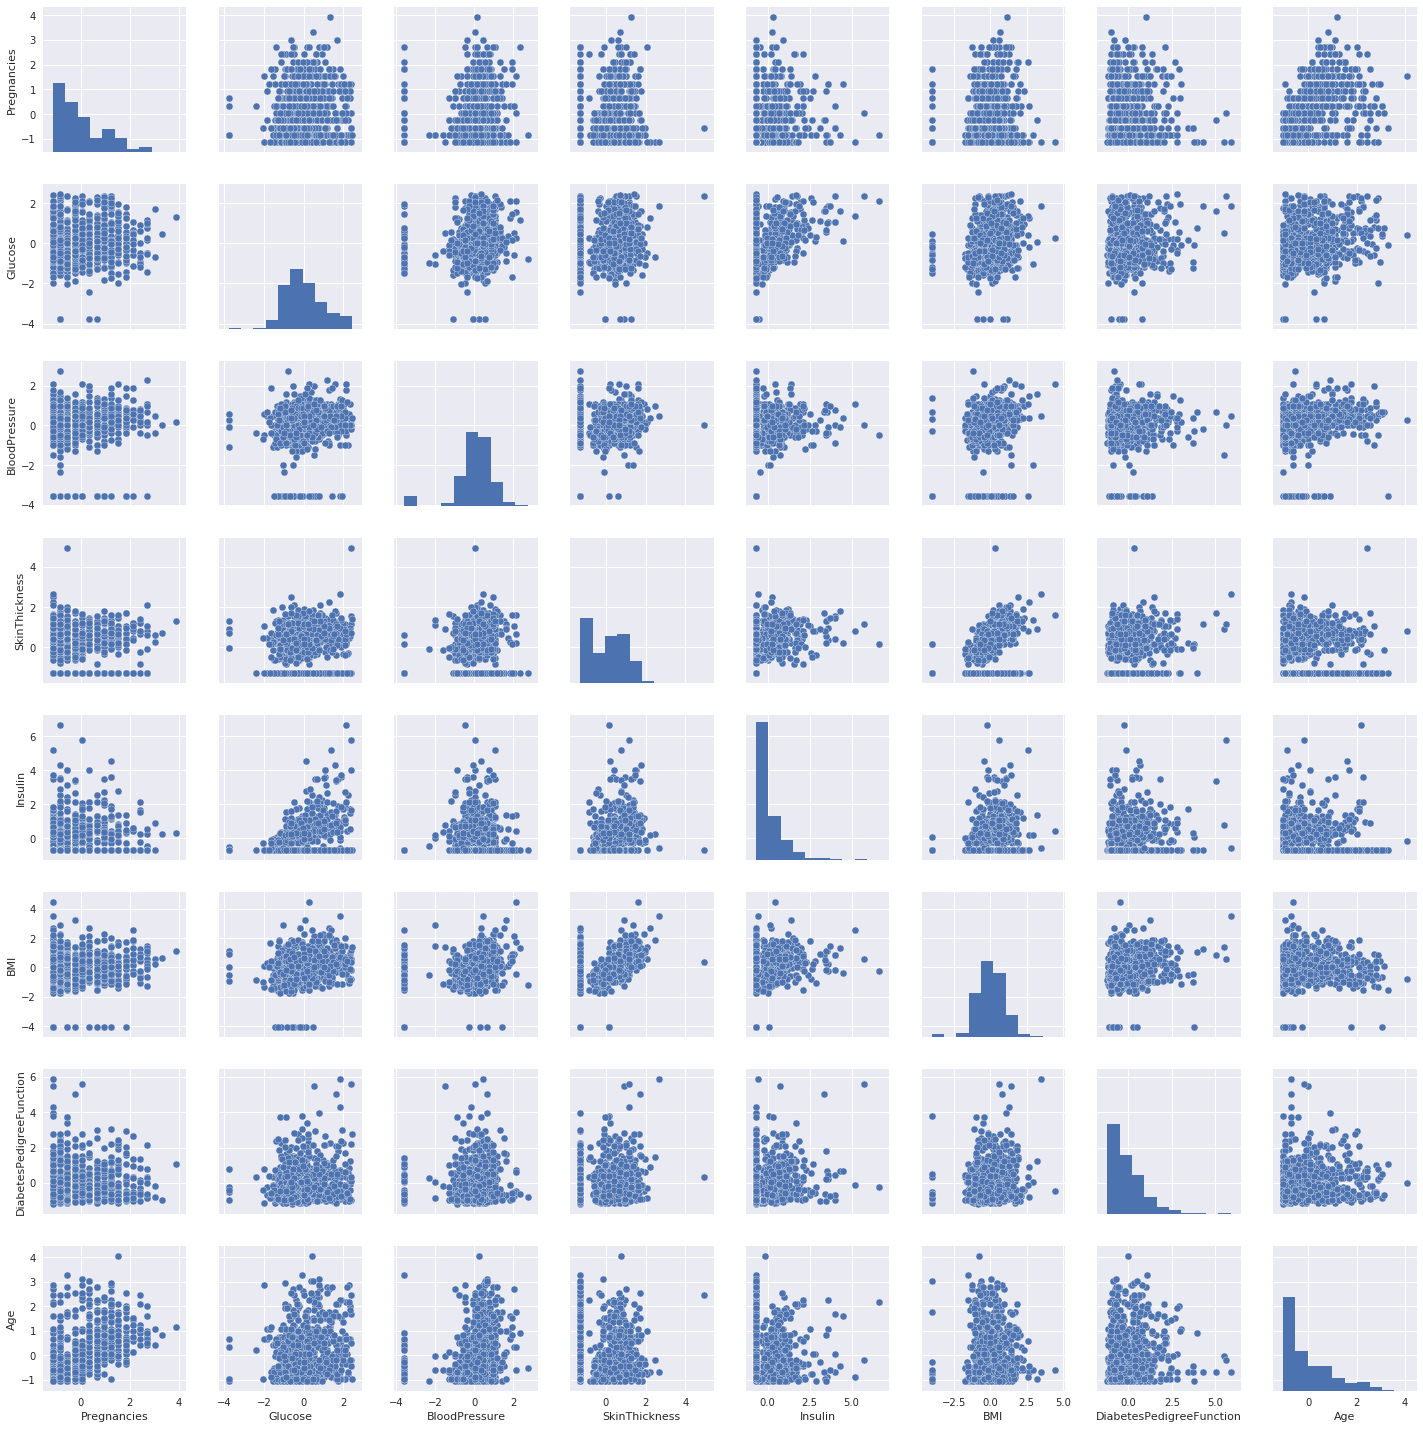

In [7]:
sns.pairplot(df)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

In [9]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
x_predicted=clf.predict(X_test)
metrics.accuracy_score(y_test,x_predicted)

0.6233766233766234

In [10]:
from sklearn import neighbors
KNN=neighbors.KNeighborsClassifier()
KNN.fit(X_train, y_train)
x_predicted=KNN.predict(X_test)
metrics.accuracy_score(y_test,x_predicted)

0.7012987012987013

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.7402597402597403

In [12]:
from sklearn import ensemble
clf1 = ensemble.GradientBoostingClassifier(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1)
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.7337662337662337

In [19]:
np.random.seed(seed)
model = Sequential() # create model
model.add(Dense(5, input_dim=8, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint
# specify filepath- this will write a new file for each epoch with the epoch number contained within the filename
filepath="weight/nn_weights-{epoch:02d}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0,save_weights_only=False, save_best_only=False, mode='max')

In [24]:
model_fitted=model.fit(X_train, y_train, epochs=1000, verbose=0, batch_size=X_train.shape[0],callbacks=[checkpoint], initial_epoch=0)

In [25]:
# [loss, accuracy]
model.evaluate(X_test, y_test, verbose=0)


[0.4524788786838581, 0.8051948067429778]

In [26]:
# training loss and accuracy over the first five epochs
[model_fitted.history['loss'][0:5], model_fitted.history['acc'][0:5]]


[[0.44676998257637024,
  0.446749746799469,
  0.4467301666736603,
  0.4467095136642456,
  0.44668886065483093],
 [0.7736156582832336,
  0.7736156582832336,
  0.7736156582832336,
  0.7736156582832336,
  0.7736156582832336]]

In [31]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,-0.250952,0.222381,0.459827,-1.288212,-0.692891,-1.382478,-0.615731,1.851434
719,0.342981,-0.747831,0.356432,0.405445,-0.692891,0.457851,-0.283518,1.596171
247,-1.141852,1.380375,1.080200,0.781814,5.211479,2.577403,-0.135532,-0.871374
309,-0.547919,0.097192,-0.057150,0.468173,1.087103,0.115169,1.217481,-0.275760
133,1.233880,-1.154694,0.253036,0.656358,-0.692891,0.800533,-0.044928,0.490030


In [34]:
x=np.array([[1,2,3,4,5,6,7,8]])
model.predict(x)

array([[0.9435645]], dtype=float32)

In [27]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [28]:
model.save_weights("model.h5")
print("saved model to disk")

saved model to disk
